In [2]:
import seaborn as sns

# Similar functions for similar tasks
* 네임스페이스 : 내부 식별자에 사용될 수 있는 유효범위를 제공하는 선언적 영역
* seaborn의 네임스페이스는 평면적이라 모든 기능을 최상위 수준에서 액세스 할 수 있다.
* 그러나, 코드 자체는 서로 다른 수단을 통해 유사한 시각화 목표를 달성하는 함수모듈이다. (계층구조)
* 모듈에는 관계형, 분산형(distributions), 범주형 등이 있다.

In [ ]:
# 분산형 모듈

* 데이터 포인트의 분포를 나타내는데 특화된 함수.
* 히스토그램 등이 포함됨.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

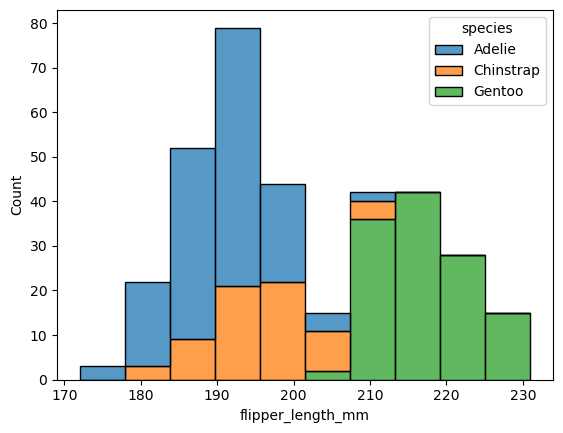

In [16]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

# data : 입력 데이터
# hue : 범주로 사용할 컬럼명
# multiple='stack' : 그래프를 그리는 방식, 쌓인 형태의 히스토그램 출력

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

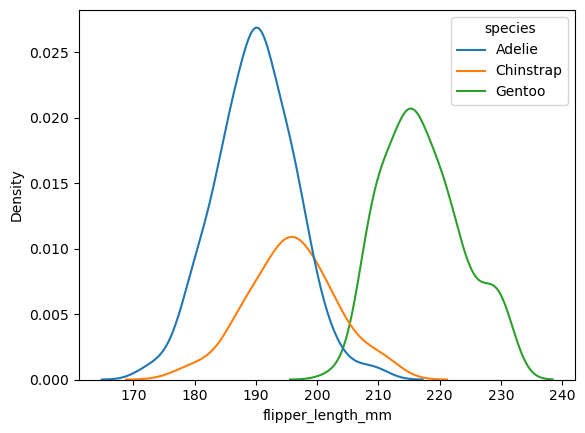

In [21]:
# 또 다른 옵션 사용해보기
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

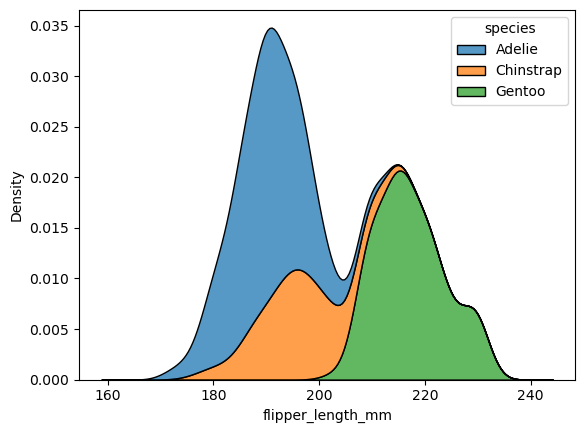

In [20]:
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

* 'multiple="stack"' 모듈 내의 함수는 많은 기본코드를 공유하고, 라이브러리의 다른 구성요소에는 없을 수 있는 유사한 기능을 제공한다.
* 다양한 표현에는 보완적인 강점과 약점이 있는 경우가 많기 때문에 다양한 시각적 표현 간 전환을 용이하도록 설계되었다.

# Figure-level vs. axes-level functions
* seaborn 기능은 '축'과 '그림' 수준으로 분류된다.
* 위의 예(kdeplot)는 축 수준의 함수이다.matplotlib.pyplot.Axes 함수의 반환 값인 단일 개체에 데이터를 표시한다.
* 그림수준 함수 FacetGrid는 그림을 관리하는 seaborn 객체를 통해 matplotlib과 인터페이스 한다.
* 각 모듈에는 다양한 축 수준 기능에 대한 단일 인터페이스를 제공하는 단일그림수준 기능이 있다.
* 조직의 예)
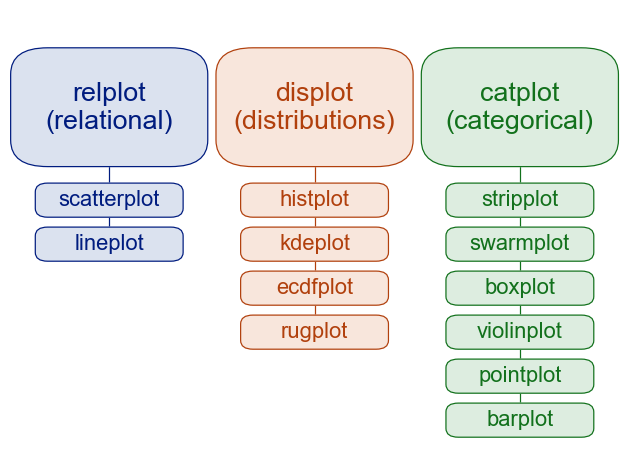

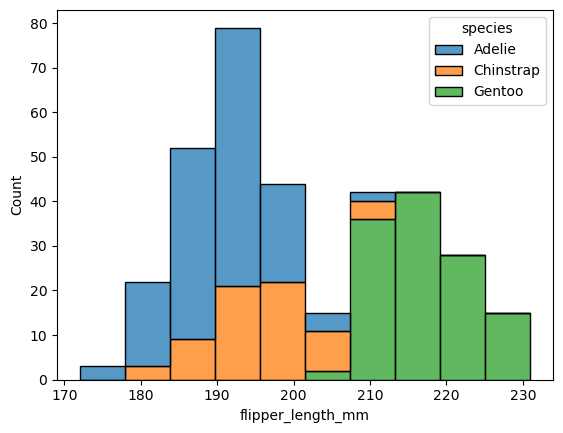

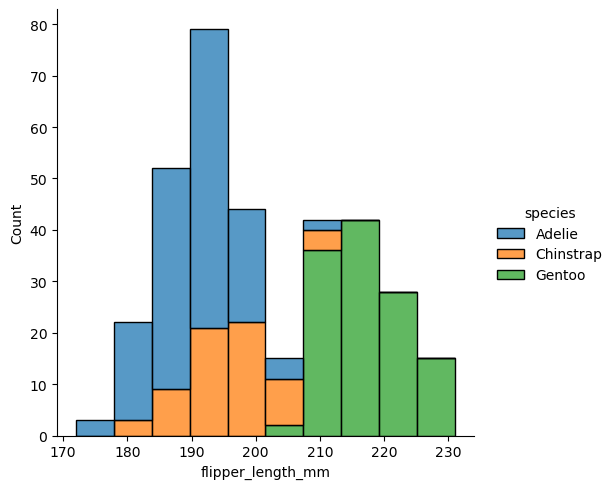

In [25]:
# displot() : 그림수준 함수.
hist = sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
dis = sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

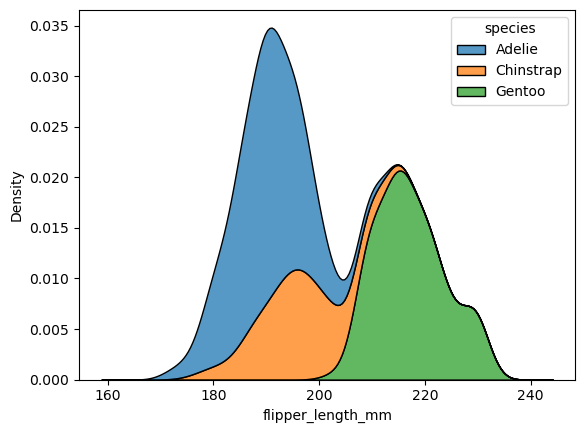

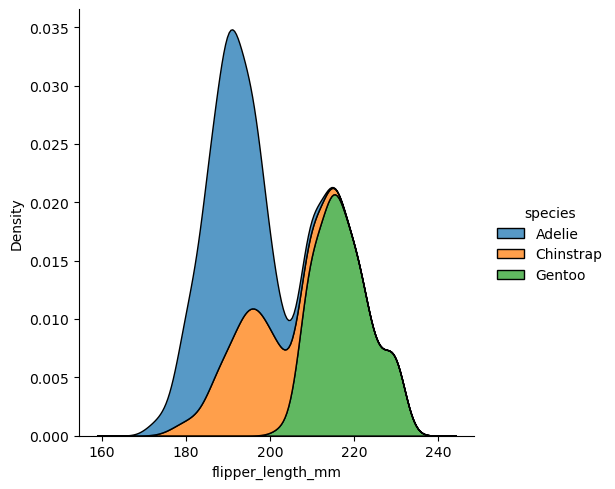

In [24]:
kde = sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')
dis_2 = sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack', kind='kde')

* 비슷해 보이지만 displot(figure수준)은 몇 가지 차이점을 가지고 있다.
* 범례 : 그래프 외부에 배치된다. 모양도 살짝 다르다.
* figure 수준 함수가 제공하는 가장 유용한 기능은 여러 서브플롯이 있는 figure를 쉽게 생성할 수 있다는 것이다.

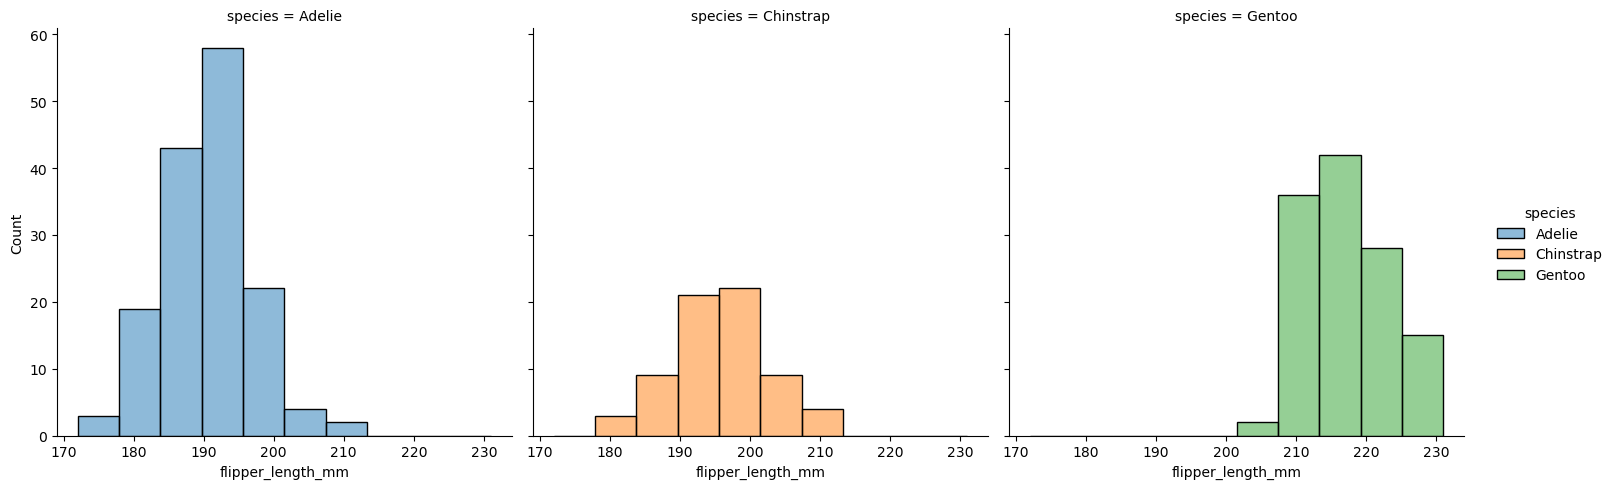

In [26]:
# ex) 동일한 축에 각각의 세 가지 분포를 표현하는 대신 그림의 열에 걸쳐 각 분포를 한 줄에 구현해낼 수 있음.

sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

* figure 수준의 함수는 해당하는 축 함수를 래핑하고 종류별 키워드 인수를 기본함수로 전달한다.
* 단점 : 종류별 매개변수가 함수 서명이나 doc string에 나타나지 않는다.또, 일부 기능은 검색하기 어렵다.

## Axes-level functions make self-contained plots
